In [1]:
# load dataset
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys() # show dictionary keys available in dataset

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']    # establish X,y as our data & labels

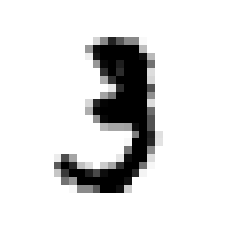

In [3]:
# lets play around and plot one of the characters just to check it works as expected.

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

some_digit = X[10]
some_digit_image = some_digit.reshape(28, 28) # create matrix from 28x28 (784) vector

plt.imshow(some_digit_image, cmap="binary")
plt.axis('off')
plt.show()
# looks like a 3 
y[10] # outputs '3'
y = y.astype(np.uint8)  # convert y strings to integers

In [4]:
# split training data into a training and test set  
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
# time to train the classifier
# starting with a subset of data, just the # 3's
y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_3)

# training done, now test it against our sample...
sgd_clf.predict([some_digit])

array([ True])

In [8]:
# measure accuracy using cross validation
from sklearn.model_selection import cross_val_score
cross_val_result = cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")
cross_val_result * 100  # multiply by 100 to show % accuracy

array([94.96 , 96.24 , 96.275])

In [11]:
# with skewed datasets, i.e. when some classes are much more frequent that others.. its better to use
# a confusion matrix - this counts how many A´s are classed as B´s 
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_3, cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_3, y_train_pred)
# this provides us with the 2 X 2 matrix showing # count of true negatives, false positives, false negatives and true positives.


array([[53477,   392],
       [ 2113,  4018]], dtype=int64)

In [15]:
# we can analyse the precision of the set
from sklearn.metrics import precision_score, recall_score
print (precision_score(y_train_3, y_train_pred))
print (recall_score(y_train_3, y_train_pred))

0.9111111111111111
0.655358016636764
